In [1]:
#Importing the Essential libraries and their Functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import sklearn
from sklearn.model_selection import train_test_split

In [5]:
from sklearn import svm

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [107]:
from sklearn.model_selection import cross_val_score, KFold

In [7]:
Data_Path = pd.read_csv("C:/Users/HP/Desktop/LinkedIn/Apziva/Projects/Term Deposit Marketing/term-deposit-marketing-2020.csv")

print(Data_Path)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign    y

# Feature Engineering

#EDA

In [8]:
Data_Path.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [9]:
Data_Path.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39990,26,technician,single,secondary,no,1231,yes,no,cellular,3,jun,385,2,yes
39991,33,services,single,tertiary,no,1268,yes,no,cellular,3,jun,2219,1,no
39992,45,technician,married,secondary,no,406,yes,no,cellular,3,jun,240,1,no
39993,32,management,married,tertiary,no,3154,no,no,cellular,3,jun,126,1,no
39994,35,management,married,tertiary,no,3109,yes,no,cellular,3,jun,467,1,no
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [10]:
Data_Path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [11]:
Data_Path.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [12]:
Data_Path.dtypes.value_counts()

object    9
int64     5
dtype: int64

#Check if there's any Nulls or Outliers

In [13]:
Data_Path.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
Data_Path.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [15]:
Data_Path.count()

age          40000
job          40000
marital      40000
education    40000
default      40000
balance      40000
housing      40000
loan         40000
contact      40000
day          40000
month        40000
duration     40000
campaign     40000
y            40000
dtype: int64

In [16]:
Data_Path.median()

age          39.0
balance     407.0
day          17.0
duration    175.0
campaign      2.0
dtype: float64

In [17]:
Data_Path.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,no


In [18]:
Data_Path.min()

age                19
job             admin
marital      divorced
education     primary
default            no
balance         -8019
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            0
campaign            1
y                  no
dtype: object

In [19]:
Data_Path.max()

age               95
job          unknown
marital       single
education    unknown
default          yes
balance       102127
housing          yes
loan             yes
contact      unknown
day               31
month            oct
duration        4918
campaign          63
y                yes
dtype: object

In [20]:
Data_Path.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [21]:
Data_Path[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']].describe()

,job,marital,education,default,housing,loan,contact,month
count,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11
top,blue-collar,married,secondary,no,yes,no,cellular,may
freq,9383,24386,20993,39191,24031,33070,24914,13532


In [22]:
Data_Path.values

array([[58, 'management', 'married', ..., 261, 1, 'no'],
       [44, 'technician', 'single', ..., 151, 1, 'no'],
       [33, 'entrepreneur', 'married', ..., 76, 1, 'no'],
       ...,
       [54, 'admin', 'divorced', ..., 170, 1, 'yes'],
       [34, 'management', 'married', ..., 342, 1, 'no'],
       [38, 'technician', 'married', ..., 113, 1, 'no']], dtype=object)

In [23]:
Data_Path.ndim

2

In [24]:
Data_Path['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<AxesSubplot:>

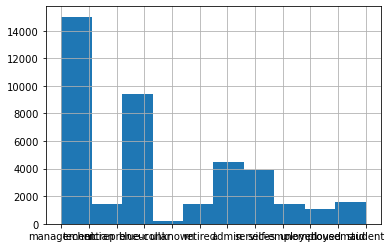

In [25]:
Data_Path['job'].hist()

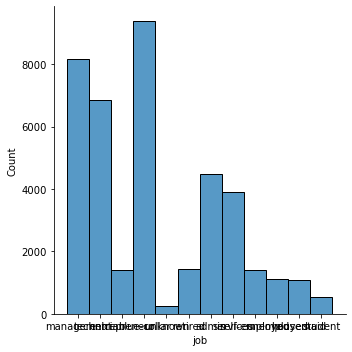

In [26]:
sns.displot(Data_Path['job'])

<AxesSubplot:xlabel='job', ylabel='count'>

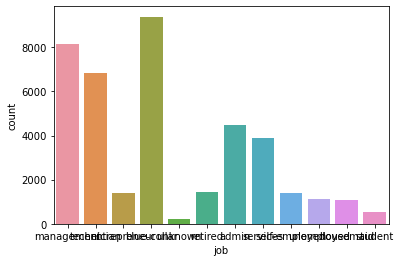

In [27]:
sns.countplot(x='job', data=Data_Path)

<AxesSubplot:xlabel='education', ylabel='count'>

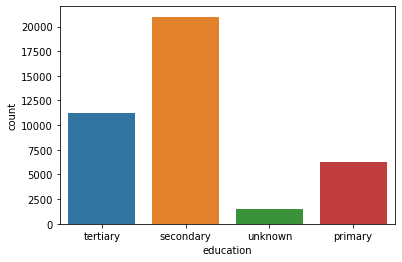

In [28]:
sns.countplot(x='education', data=Data_Path)

In [29]:
Data_Path['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

<AxesSubplot:xlabel='month', ylabel='count'>

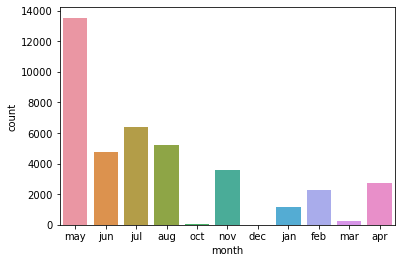

In [30]:
sns.countplot(x='month', data=Data_Path)

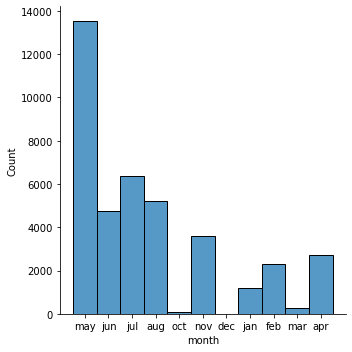

In [31]:
sns.displot(Data_Path['month'])

<AxesSubplot:xlabel='contact', ylabel='count'>

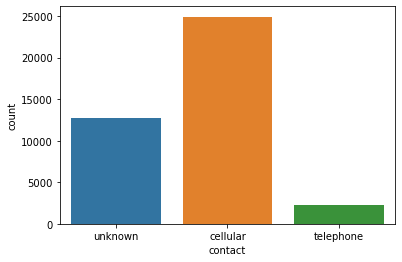

In [44]:
sns.countplot(x='contact', data=Data_Path)

In [61]:
Data_Path['contact']

0         unknown
1         unknown
2         unknown
3         unknown
4         unknown
           ...   
39995    cellular
39996    cellular
39997    cellular
39998    cellular
39999    cellular
Name: contact, Length: 40000, dtype: object

#Features Encoding

In [32]:
data = LabelEncoder()
marital_Encoding = data.fit_transform(Data_Path['marital'])

marital_Encoding

array([1, 2, 1, ..., 0, 1, 1])

In [33]:
Data_Path['marital_encoded'] = marital_Encoding

In [34]:
data = LabelEncoder()
loan_Encoding = data.fit_transform(Data_Path['loan'])

loan_Encoding

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
Data_Path['loan_Encoded'] = loan_Encoding

In [36]:
data = LabelEncoder()
Default_Encoding = data.fit_transform(Data_Path['default'])

Default_Encoding

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
Data_Path['default_Encoded'] = Default_Encoding

In [38]:
data = LabelEncoder()
Housing_Encoding = data.fit_transform(Data_Path['housing'])

Housing_Encoding

array([1, 1, 1, ..., 0, 0, 1])

In [39]:
Data_Path['housing_Encoded'] = Housing_Encoding

In [40]:
Data_Path.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,2,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,1,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,2,0,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no,1,0,0,1
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no,2,1,0,1
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no,0,0,1,1
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no,1,0,0,1
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no,2,0,0,1


In [41]:
Data_Path.drop(['marital', 'default', 'housing', 'loan'], axis=1, inplace=True)

In [42]:
Data_Path.head(10)

,age,job,education,balance,contact,day,month,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded
0,58,management,tertiary,2143,unknown,5,may,261,1,no,1,0,0,1
1,44,technician,secondary,29,unknown,5,may,151,1,no,2,0,0,1
2,33,entrepreneur,secondary,2,unknown,5,may,76,1,no,1,1,0,1
3,47,blue-collar,unknown,1506,unknown,5,may,92,1,no,1,0,0,1
4,33,unknown,unknown,1,unknown,5,may,198,1,no,2,0,0,0
5,35,management,tertiary,231,unknown,5,may,139,1,no,1,0,0,1
6,28,management,tertiary,447,unknown,5,may,217,1,no,2,1,0,1
7,42,entrepreneur,tertiary,2,unknown,5,may,380,1,no,0,0,1,1
8,58,retired,primary,121,unknown,5,may,50,1,no,1,0,0,1
9,43,technician,secondary,593,unknown,5,may,55,1,no,2,0,0,1


#Encoding using Dictionary

In [46]:
month_dict = {'jan': 1 , 'feb': 2 , 'mar': 3 , 'apr': 4 , 'may': 5 ,
                 'jun': 6 , 'jul': 7 , 'aug': 8 , 'oct': 10,
                 'nov': 11, 'dec': 12}       

Data_Path['month_encoded'] = Data_Path['month'].map(month_dict)

Data_Path.head(10)

,age,job,education,balance,contact,day,month,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded
0,58,management,tertiary,2143,unknown,5,may,261,1,no,1,0,0,1,3,5
1,44,technician,secondary,29,unknown,5,may,151,1,no,2,0,0,1,2,5
2,33,entrepreneur,secondary,2,unknown,5,may,76,1,no,1,1,0,1,2,5
3,47,blue-collar,unknown,1506,unknown,5,may,92,1,no,1,0,0,1,0,5
4,33,unknown,unknown,1,unknown,5,may,198,1,no,2,0,0,0,0,5
5,35,management,tertiary,231,unknown,5,may,139,1,no,1,0,0,1,3,5
6,28,management,tertiary,447,unknown,5,may,217,1,no,2,1,0,1,3,5
7,42,entrepreneur,tertiary,2,unknown,5,may,380,1,no,0,0,1,1,3,5
8,58,retired,primary,121,unknown,5,may,50,1,no,1,0,0,1,1,5
9,43,technician,secondary,593,unknown,5,may,55,1,no,2,0,0,1,2,5


In [45]:
education_dict = {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown':  0}

Data_Path['education_encoded'] = Data_Path['education'].map(education_dict)

Data_Path.head(10)

,age,job,education,balance,contact,day,month,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded
0,58,management,tertiary,2143,unknown,5,may,261,1,no,1,0,0,1,3
1,44,technician,secondary,29,unknown,5,may,151,1,no,2,0,0,1,2
2,33,entrepreneur,secondary,2,unknown,5,may,76,1,no,1,1,0,1,2
3,47,blue-collar,unknown,1506,unknown,5,may,92,1,no,1,0,0,1,0
4,33,unknown,unknown,1,unknown,5,may,198,1,no,2,0,0,0,0
5,35,management,tertiary,231,unknown,5,may,139,1,no,1,0,0,1,3
6,28,management,tertiary,447,unknown,5,may,217,1,no,2,1,0,1,3
7,42,entrepreneur,tertiary,2,unknown,5,may,380,1,no,0,0,1,1,3
8,58,retired,primary,121,unknown,5,may,50,1,no,1,0,0,1,1
9,43,technician,secondary,593,unknown,5,may,55,1,no,2,0,0,1,2


In [47]:
job_dict = {'management': 1, 'technician': 2, 'entrepreneur': 3, 'blue-collar': 4,
            'unknown': 5, 'retired': 6, 'admin': 7, 'services': 8, 'self-employed': 9,
            'unemployed': 10, 'housemaid': 11, 'student': 12}

Data_Path['job_encoded'] = Data_Path['job'].map(job_dict)

Data_Path.head(10)

,age,job,education,balance,contact,day,month,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded
0,58,management,tertiary,2143,unknown,5,may,261,1,no,1,0,0,1,3,5,1
1,44,technician,secondary,29,unknown,5,may,151,1,no,2,0,0,1,2,5,2
2,33,entrepreneur,secondary,2,unknown,5,may,76,1,no,1,1,0,1,2,5,3
3,47,blue-collar,unknown,1506,unknown,5,may,92,1,no,1,0,0,1,0,5,4
4,33,unknown,unknown,1,unknown,5,may,198,1,no,2,0,0,0,0,5,5
5,35,management,tertiary,231,unknown,5,may,139,1,no,1,0,0,1,3,5,1
6,28,management,tertiary,447,unknown,5,may,217,1,no,2,1,0,1,3,5,1
7,42,entrepreneur,tertiary,2,unknown,5,may,380,1,no,0,0,1,1,3,5,3
8,58,retired,primary,121,unknown,5,may,50,1,no,1,0,0,1,1,5,6
9,43,technician,secondary,593,unknown,5,may,55,1,no,2,0,0,1,2,5,2


In [62]:
contact_dict = {'cellular': 2 , 'telephone': 1 , 'unknown': 0} 

Data_Path['contact_encoded'] = Data_Path['contact'].map(contact_dict)

Data_Path.head(10)

,age,job,education,balance,contact,day,month,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
0,58,management,tertiary,2143,unknown,5,may,261,1,no,1,0,0,1,3,5,1,0
1,44,technician,secondary,29,unknown,5,may,151,1,no,2,0,0,1,2,5,2,0
2,33,entrepreneur,secondary,2,unknown,5,may,76,1,no,1,1,0,1,2,5,3,0
3,47,blue-collar,unknown,1506,unknown,5,may,92,1,no,1,0,0,1,0,5,4,0
4,33,unknown,unknown,1,unknown,5,may,198,1,no,2,0,0,0,0,5,5,0
5,35,management,tertiary,231,unknown,5,may,139,1,no,1,0,0,1,3,5,1,0
6,28,management,tertiary,447,unknown,5,may,217,1,no,2,1,0,1,3,5,1,0
7,42,entrepreneur,tertiary,2,unknown,5,may,380,1,no,0,0,1,1,3,5,3,0
8,58,retired,primary,121,unknown,5,may,50,1,no,1,0,0,1,1,5,6,0
9,43,technician,secondary,593,unknown,5,may,55,1,no,2,0,0,1,2,5,2,0


In [64]:
Data_Path.head(20)

,age,job,education,balance,contact,day,month,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
0,58,management,tertiary,2143,unknown,5,may,261,1,no,1,0,0,1,3,5,1,0
1,44,technician,secondary,29,unknown,5,may,151,1,no,2,0,0,1,2,5,2,0
2,33,entrepreneur,secondary,2,unknown,5,may,76,1,no,1,1,0,1,2,5,3,0
3,47,blue-collar,unknown,1506,unknown,5,may,92,1,no,1,0,0,1,0,5,4,0
4,33,unknown,unknown,1,unknown,5,may,198,1,no,2,0,0,0,0,5,5,0
5,35,management,tertiary,231,unknown,5,may,139,1,no,1,0,0,1,3,5,1,0
6,28,management,tertiary,447,unknown,5,may,217,1,no,2,1,0,1,3,5,1,0
7,42,entrepreneur,tertiary,2,unknown,5,may,380,1,no,0,0,1,1,3,5,3,0
8,58,retired,primary,121,unknown,5,may,50,1,no,1,0,0,1,1,5,6,0
9,43,technician,secondary,593,unknown,5,may,55,1,no,2,0,0,1,2,5,2,0


In [65]:
Data_Path.tail(20)

,age,job,education,balance,contact,day,month,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
39980,37,management,tertiary,865,cellular,3,jun,101,1,no,1,0,0,1,3,6,1,2
39981,31,student,secondary,216,cellular,3,jun,138,1,no,2,0,0,0,2,6,12,2
39982,25,student,tertiary,1189,cellular,3,jun,165,1,yes,2,0,0,0,3,6,12,2
39983,34,management,tertiary,3402,cellular,3,jun,88,2,no,1,0,0,0,3,6,1,2
39984,45,admin,secondary,204,cellular,3,jun,224,2,yes,1,0,0,1,2,6,7,2
39985,39,technician,tertiary,794,telephone,3,jun,116,2,no,1,0,0,0,3,6,2,1
39986,29,management,tertiary,637,cellular,3,jun,340,1,yes,2,0,0,1,3,6,1,2
39987,38,technician,tertiary,34,cellular,3,jun,88,1,no,1,1,0,0,3,6,2,2
39988,55,management,tertiary,2383,cellular,3,jun,591,2,yes,0,0,0,0,3,6,1,2
39989,51,management,tertiary,102127,cellular,3,jun,90,1,no,2,0,0,0,3,6,1,2


In [68]:
Data_Path.describe()

,age,balance,day,duration,campaign,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175,1.154100,0.173250,0.020225,0.600775,2.046850,6.009800,4.452150,1.303725
std,9.641776,2903.769716,8.278127,259.366498,3.239051,0.605485,0.378468,0.140771,0.489745,0.766694,2.301095,3.020437,0.921817
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,5.000000,2.000000,0.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.000000,6.000000,4.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000,2.000000,0.000000,0.000000,1.000000,3.000000,7.000000,7.000000,2.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,2.000000,1.000000,1.000000,1.000000,3.000000,12.000000,12.000000,2.000000


In [69]:
Data_Path.drop(['job', 'education', 'contact', 'month'], axis=1, inplace=True)

Data_Path

,age,balance,day,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
0,58,2143,5,261,1,no,1,0,0,1,3,5,1,0
1,44,29,5,151,1,no,2,0,0,1,2,5,2,0
2,33,2,5,76,1,no,1,1,0,1,2,5,3,0
3,47,1506,5,92,1,no,1,0,0,1,0,5,4,0
4,33,1,5,198,1,no,2,0,0,0,0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,no,1,0,0,0,3,6,2,2
39996,30,3340,3,238,3,yes,2,0,0,0,3,6,1,2
39997,54,200,3,170,1,yes,0,0,0,0,2,6,7,2
39998,34,1047,3,342,1,no,1,0,0,0,3,6,1,2


In [70]:
Data_Path.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'y', 'marital_encoded',
       'loan_Encoded', 'default_Encoded', 'housing_Encoded',
       'education_encoded', 'month_encoded', 'job_encoded', 'contact_encoded'],
      dtype='object')

In [74]:
Data_Path.dtypes.value_counts()

int64     9
int32     4
object    1
dtype: int64

#Target Value Encoding using Labor Encoder

In [75]:
data = LabelEncoder()
y = data.fit_transform(Data_Path['y'])

y

array([0, 0, 0, ..., 1, 0, 0])

In [76]:
Data_Path['y'] = y

In [77]:
Data_Path

,age,balance,day,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
0,58,2143,5,261,1,0,1,0,0,1,3,5,1,0
1,44,29,5,151,1,0,2,0,0,1,2,5,2,0
2,33,2,5,76,1,0,1,1,0,1,2,5,3,0
3,47,1506,5,92,1,0,1,0,0,1,0,5,4,0
4,33,1,5,198,1,0,2,0,0,0,0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,0,1,0,0,0,3,6,2,2
39996,30,3340,3,238,3,1,2,0,0,0,3,6,1,2
39997,54,200,3,170,1,1,0,0,0,0,2,6,7,2
39998,34,1047,3,342,1,0,1,0,0,0,3,6,1,2


#Correlation Cofficient 

In [78]:
Data_Path.corr()

,age,balance,day,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
age,1.000000,0.081517,-0.011689,-0.036270,0.016204,-0.020273,-0.386716,0.000041,-0.014857,-0.179606,-0.161471,0.095266,0.008210,-0.041114
balance,0.081517,1.000000,0.011662,0.014072,-0.008137,0.030232,0.008542,-0.080596,-0.070069,-0.049946,0.052765,0.099736,-0.035800,0.011681
day,-0.011689,0.011662,1.000000,-0.032983,0.165429,-0.006420,0.000099,0.005838,0.006287,-0.050622,0.032272,0.142358,-0.027017,0.045535
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387,0.461169,0.015772,-0.003952,-0.008597,0.022455,0.004813,-0.021329,0.008926,0.008292
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000,-0.040350,-0.001259,0.000582,0.012135,-0.054823,0.006220,0.082301,-0.030348,-0.003019
y,-0.020273,0.030232,-0.006420,0.461169,-0.040350,1.000000,0.030229,-0.031029,-0.006559,-0.054336,0.043828,-0.043784,0.002158,0.089626
marital_encoded,-0.386716,0.008542,0.000099,0.015772,-0.001259,0.030229,1.000000,-0.042975,-0.004595,0.004453,0.088441,-0.068283,-0.001081,0.029242
loan_Encoded,0.000041,-0.080596,0.005838,-0.003952,0.000582,-0.031029,-0.042975,1.000000,0.075006,0.004266,0.005370,0.044699,-0.002436,0.030899
default_Encoded,-0.014857,-0.070069,0.006287,-0.008597,0.012135,-0.006559,-0.004595,0.075006,1.000000,-0.019229,-0.007390,0.024472,-0.005221,-0.006881
housing_Encoded,-0.179606,-0.049946,-0.050622,0.022455,-0.054823,-0.054336,0.004453,0.004266,-0.019229,1.000000,-0.044800,-0.161402,-0.011402,-0.164406


#Correlation Cofficient using Heatmap

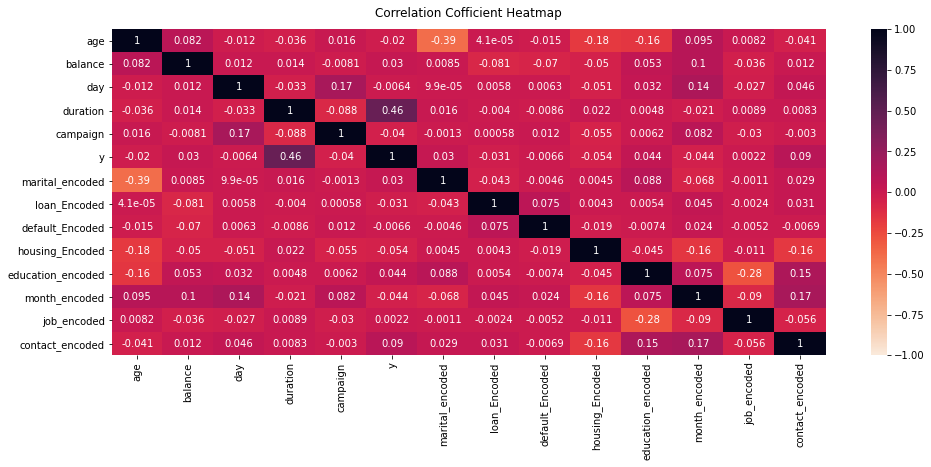

In [110]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1, annot=True,cmap="rocket_r")

heatmap.set_title('Correlation Cofficient Heatmap', fontdict={'fontsize':12}, pad=12);

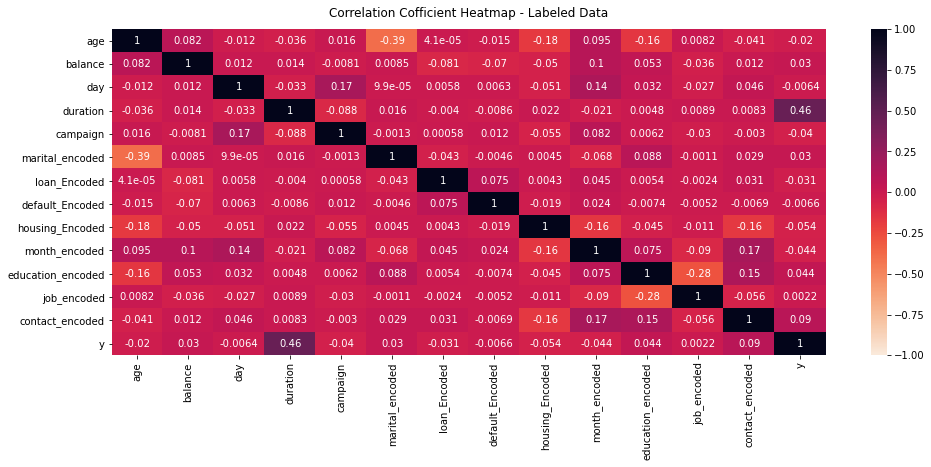

In [116]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(data_path_2.corr(), vmin=-1, vmax=1, annot=True,cmap="rocket_r")

heatmap.set_title('Correlation Cofficient Heatmap - Labeled Data', fontdict={'fontsize':12}, pad=12);

#Feature Scaling

In [111]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Data_Path)
MinMax_Data = pd.DataFrame(scaled_data, 
                               columns=Data_Path.columns)

In [112]:
MinMax_Data.head(20)

,age,balance,day,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
0,0.513158,0.092259,0.133333,0.053070,0.0,0.0,0.5,0.0,0.0,1.0,1.000000,0.363636,0.000000,0.0
1,0.328947,0.073067,0.133333,0.030704,0.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.363636,0.090909,0.0
2,0.184211,0.072822,0.133333,0.015453,0.0,0.0,0.5,1.0,0.0,1.0,0.666667,0.363636,0.181818,0.0
3,0.368421,0.086476,0.133333,0.018707,0.0,0.0,0.5,0.0,0.0,1.0,0.000000,0.363636,0.272727,0.0
4,0.184211,0.072812,0.133333,0.040260,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.363636,0.363636,0.0
5,0.210526,0.074901,0.133333,0.028264,0.0,0.0,0.5,0.0,0.0,1.0,1.000000,0.363636,0.000000,0.0
6,0.118421,0.076862,0.133333,0.044124,0.0,0.0,1.0,1.0,0.0,1.0,1.000000,0.363636,0.000000,0.0
7,0.302632,0.072822,0.133333,0.077267,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.363636,0.181818,0.0
8,0.513158,0.073902,0.133333,0.010167,0.0,0.0,0.5,0.0,0.0,1.0,0.333333,0.363636,0.454545,0.0
9,0.315789,0.078187,0.133333,0.011183,0.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.363636,0.090909,0.0


In [113]:
MinMax_Data.tail(20)

,age,balance,day,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
39980,0.236842,0.080657,0.066667,0.020537,0.000000,0.0,0.5,0.0,0.0,1.0,1.000000,0.454545,0.000000,1.0
39981,0.157895,0.074764,0.066667,0.028060,0.000000,0.0,1.0,0.0,0.0,0.0,0.666667,0.454545,1.000000,1.0
39982,0.078947,0.083598,0.066667,0.033550,0.000000,1.0,1.0,0.0,0.0,0.0,1.000000,0.454545,1.000000,1.0
39983,0.197368,0.103690,0.066667,0.017893,0.016129,0.0,0.5,0.0,0.0,0.0,1.000000,0.454545,0.000000,1.0
39984,0.342105,0.074655,0.066667,0.045547,0.016129,1.0,0.5,0.0,0.0,1.0,0.666667,0.454545,0.545455,1.0
39985,0.263158,0.080012,0.066667,0.023587,0.016129,0.0,0.5,0.0,0.0,0.0,1.000000,0.454545,0.090909,0.5
39986,0.131579,0.078587,0.066667,0.069134,0.000000,1.0,1.0,0.0,0.0,1.0,1.000000,0.454545,0.000000,1.0
39987,0.250000,0.073112,0.066667,0.017893,0.000000,0.0,0.5,1.0,0.0,0.0,1.000000,0.454545,0.090909,1.0
39988,0.473684,0.094438,0.066667,0.120171,0.016129,1.0,0.0,0.0,0.0,0.0,1.000000,0.454545,0.000000,1.0
39989,0.421053,1.000000,0.066667,0.018300,0.000000,0.0,1.0,0.0,0.0,0.0,1.000000,0.454545,0.000000,1.0


In [114]:
MinMax_Data

,age,balance,day,duration,campaign,y,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,education_encoded,month_encoded,job_encoded,contact_encoded
0,0.513158,0.092259,0.133333,0.053070,0.000000,0.0,0.5,0.0,0.0,1.0,1.000000,0.363636,0.000000,0.0
1,0.328947,0.073067,0.133333,0.030704,0.000000,0.0,1.0,0.0,0.0,1.0,0.666667,0.363636,0.090909,0.0
2,0.184211,0.072822,0.133333,0.015453,0.000000,0.0,0.5,1.0,0.0,1.0,0.666667,0.363636,0.181818,0.0
3,0.368421,0.086476,0.133333,0.018707,0.000000,0.0,0.5,0.0,0.0,1.0,0.000000,0.363636,0.272727,0.0
4,0.184211,0.072812,0.133333,0.040260,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.363636,0.363636,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.447368,0.076390,0.066667,0.021757,0.000000,0.0,0.5,0.0,0.0,0.0,1.000000,0.454545,0.090909,1.0
39996,0.144737,0.103127,0.066667,0.048394,0.032258,1.0,1.0,0.0,0.0,0.0,1.000000,0.454545,0.000000,1.0
39997,0.460526,0.074619,0.066667,0.034567,0.000000,1.0,0.0,0.0,0.0,0.0,0.666667,0.454545,0.545455,1.0
39998,0.197368,0.082309,0.066667,0.069540,0.000000,0.0,0.5,0.0,0.0,0.0,1.000000,0.454545,0.000000,1.0


#Data Labeling & Splitting

In [86]:
data_path_2 = Data_Path[['age', 'balance', 'day', 'duration', 'campaign', 'marital_encoded', 'loan_Encoded', 'default_Encoded', 'housing_Encoded', 'month_encoded', 'education_encoded', 'job_encoded', 'contact_encoded', 'y']]

data_path_2

,age,balance,day,duration,campaign,marital_encoded,loan_Encoded,default_Encoded,housing_Encoded,month_encoded,education_encoded,job_encoded,contact_encoded,y
0,58,2143,5,261,1,1,0,0,1,5,3,1,0,0
1,44,29,5,151,1,2,0,0,1,5,2,2,0,0
2,33,2,5,76,1,1,1,0,1,5,2,3,0,0
3,47,1506,5,92,1,1,0,0,1,5,0,4,0,0
4,33,1,5,198,1,2,0,0,0,5,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,1,0,0,0,6,3,2,2,0
39996,30,3340,3,238,3,2,0,0,0,6,3,1,2,1
39997,54,200,3,170,1,0,0,0,0,6,2,7,2,1
39998,34,1047,3,342,1,1,0,0,0,6,3,1,2,0


In [87]:
DataLabeling = data_path_2.values
x = DataLabeling[:, 1:14] 
y = data_path_2['y']

trainX, testX, trainY, testY = train_test_split(x, y, test_size= 0.2, random_state = 10)

In [88]:
trainX.shape

(32000, 13)

In [89]:
trainY.shape

(32000,)

In [90]:
testX.shape

(8000, 13)

In [91]:
testY.shape

(8000,)

# Building the Model

#SVM Algorithm

In [92]:
#Building the SVM Algorithm

classifer = svm.SVC()

In [93]:
#Training the SVM Algorithm

classifer.fit(trainX, trainY)

SVC()

In [94]:
SVM_prediction = classifer.predict(testX)

In [95]:
#Calculating the results for Training the Algorithm in aspects of Accuracy, F1 Score, Precision Score, Recall Score

print("Accuracy", accuracy_score(testY, SVM_prediction))
print("F1 Score", f1_score(testY, SVM_prediction))
print("precision Score", precision_score(testY, SVM_prediction))
print("recall Score", recall_score(testY, SVM_prediction))

Accuracy 0.92425
F1 Score 0.016233766233766232
precision Score 0.625
recall Score 0.008223684210526315


In [96]:
confusion_matrix(testY, SVM_prediction)

array([[7389,    3],
       [ 603,    5]], dtype=int64)

<AxesSubplot:>

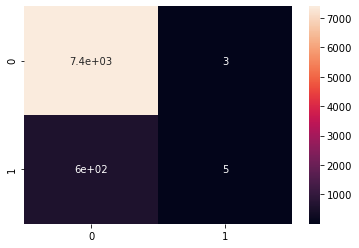

In [97]:
#Visualizing the Confusion Matrix

sns.heatmap(confusion_matrix(testY, SVM_prediction),annot=True)

# Cross-Validation

#Training the model with Cross-Validation Technique using K-Fold Cross-Validation

In [106]:
from sklearn.model_selection import cross_val_score, KFold

In [108]:
Cross_Validation = KFold(n_splits = 5)

Performance_Score = cross_val_score(classifer, x, y, cv=Cross_Validation)

print("Cross-Validation Score = ", Performance_Score)
print("\nAverage Performance Score = ", Performance_Score.mean())

Cross-Validation Score =  [0.9675   0.9465   0.945375 0.906125 0.875   ]

Average Performance Score =  0.9280999999999999


#Findings:

#Feature Encoding (Categorical Encoding) is an essential procedure in many real-world use-cases & challenges while working with Numerical & Statistical Datasets. In NLP Scope & its Tasks, this problem could be simply solved by creating Word Embeddings and passing them to the selected ML algorithms/DL Methods; for the Image Processing & Computer Vision Tasks, must of the required work for this step could be processed by default from the Neural Networks (No need for much Feature Engineering to build an efficient DL models). 

#(Duration) Feature is the most factor that will make the customer pay for the deposit. Knowing how much amount of credits by Default, and how much is the Personal loan & Housing Loan as well as the yearly Balance are all related and could helps for making the decision; but the Duration for the call will give customers more presuaded idea that the longer the call the more positive the negotiation, which in result will give them the encouragement to take this step and pay for the deposit. 